In [1]:
# Import PyDrive and associated libraries.
# This only needs to be done once per notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
#file_id = '1J05tsCBwdhEwkXygcbpKNztsXA6qErPC'
#downloaded = drive.CreateFile({'id': file_id})
#print('Downloaded content "{}"'.format(downloaded.GetContentString()))

In [2]:
!pip install twitterscraper
!pip install vaderSentiment
!pip install langdetect

     |████████████████████████████████| 92kB 4.0MB/s 
  Created wheel for twitterscraper: filename=twitterscraper-1.6.1-cp36-none-any.whl size=11349 sha256=cc2edcae08c88b2011263efe01f0287c72dc66c3b0ca98e16b8a489bd073a51c
  Stored in directory: /root/.cache/pip/wheels/1a/50/a0/808fd6df0ac14c168b73874056a1ca52e4d88c0c1ecedd4e48
Successfully built twitterscraper
     |████████████████████████████████| 133kB 3.4MB/s 
     |████████████████████████████████| 983kB 3.5MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.8-cp36-none-any.whl size=993193 sha256=5b12716430b34c2c8780e4052b76d05dd2a595ec150a7d5f744d84fa8a8f3e8e
  Stored in directory: /root/.cache/pip/wheels/8d/b3/aa/6d99de9f3841d7d3d40a60ea06e6d669e8e5012e6c8b947a57
Successfully built langdetect


In [3]:
#Importing the relevent libraries
import pandas as pd 
import datetime as dt 
from twitterscraper import query_tweets
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from langdetect import detect 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.mlab as mlab


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
begin_date = dt.date(2018,1,1)
end_date = dt.date(2020,3,26)
limit = 100000
lang = 'english'


In [5]:
from google.colab import drive
drive.mount('/gdrive/')
%cd /gdrive/My Drive/Morgan Stanley Project/CRM_Analysis_Data/
#!cat '/gdrive/My Drive/Morgan Stanley Project/Data and Notebook/pretty_ms_tweets.json'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive/
/gdrive/My Drive/Morgan Stanley Project/CRM_Analysis_Data


In [ ]:
#tweets = query_tweets("morganstanley", begindate = begin_date, enddate = end_date, limit = limit, lang = lang)


In [ ]:
#Transforming it into a dataframe
#df = pd.DataFrame(t.__dict__ for t in tweets)
#Saving a file
#df.to_csv('TwitterData.csv')

In [11]:
df = pd.read_json('pretty_gs_tweets_complaint.json')
#sample = pd.read_csv('TwitterData.csv')



In [12]:
#Sentiment Analysis
#Vader Sentiment

In [13]:
analyzer = SentimentIntensityAnalyzer()

In [14]:
sentiment = df['text'].apply(lambda x: analyzer.polarity_scores(x))

In [15]:
#Inserting the sentiment into the dataframe
df = pd.concat([df, sentiment.apply(pd.Series)],1)

In [16]:
#df['compound'].hist()
#df['neg'].hist()
#df['neu'].hist()
#df['pos'].hist()

In [17]:
df['date'] = df['timestamp'].apply(lambda x: x.date())

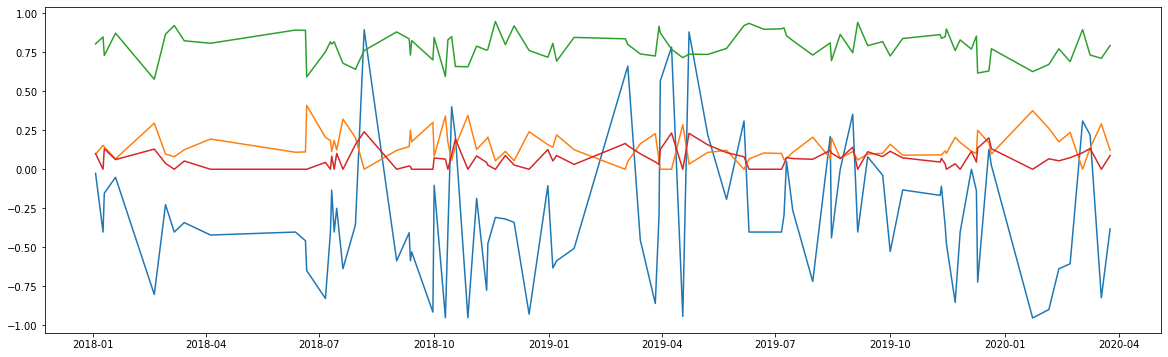

In [18]:
#Plotting the change in sentiment over time
plt.figure(figsize = (20,6))
plt.plot(df.groupby('date').mean()['compound'].index, df.groupby('date').mean()['compound'].values, label = 'com')

plt.plot(df.groupby('date').mean()['neg'].index, df.groupby('date').mean()['neg'].values)
plt.plot(df.groupby('date').mean()['neu'].index, df.groupby('date').mean()['neu'].values)
plt.plot(df.groupby('date').mean()['pos'].index, df.groupby('date').mean()['pos'].values)

In [19]:
df['text'].iloc[0]
#As we can see, several of the tweets captures donot refer to morgan stanley. Hence we need to filter out these tweets

'California regulator @CA_DaveJones cracks down on insurers tied to Apollo and Goldman Sachs over policyholder complaints, @k_chiglinsky reports. Full story on the Terminalpic.twitter.com/y4kv7THvzp'

In [20]:
Filter = df['text'].apply(lambda x: 'jp' in x.lower())
df_filter = df[Filter]
df_filter.shape
df_filter['text'].iloc[0]

'Lloyd’s (EU headquarters ), Barclays (EU headquarters), Bank of America, Goldman Sachs, Merrill Lynch, JP Morgan and lots of others have brass plated functions to protect themselves (including Mr Rees Mogg’s firm). We’re quite happy with the additional taxes, no complaints!'

Text(0, 0.5, 'Sentiment')

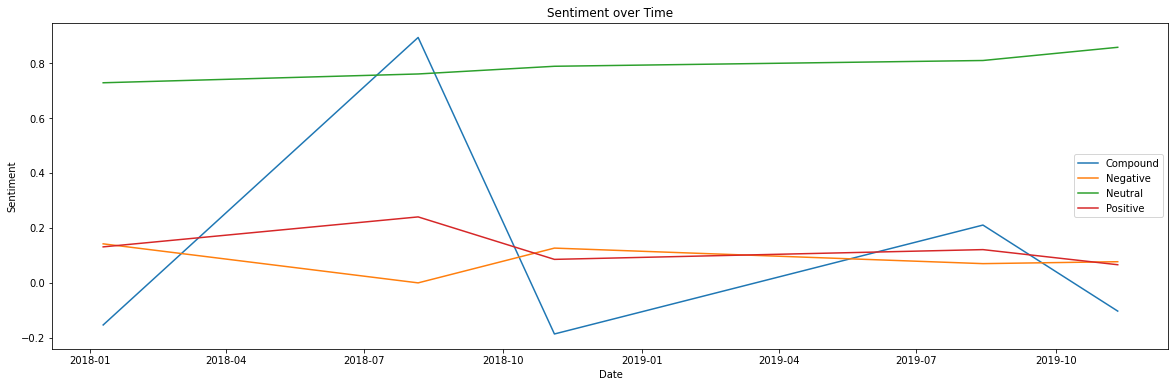

In [21]:
plt.figure(figsize = (20,6))
plt.plot(df_filter.groupby('date').mean()['compound'].index, df_filter.groupby('date').mean()['compound'].values, label = 'Compound')
plt.plot(df_filter.groupby('date').mean()['neg'].index, df_filter.groupby('date').mean()['neg'].values, label = 'Negative')
plt.plot(df_filter.groupby('date').mean()['neu'].index, df_filter.groupby('date').mean()['neu'].values, label = 'Neutral')
plt.plot(df_filter.groupby('date').mean()['pos'].index, df_filter.groupby('date').mean()['pos'].values, label = 'Positive')

plt.legend(loc = 'best')
plt.title('Sentiment over Time')
plt.xlabel('Date')
plt.ylabel('Sentiment')

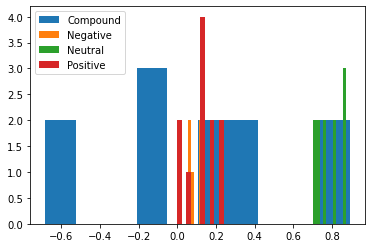

In [22]:

plt.hist(df_filter['compound'].values, label = 'Compound')
plt.hist(df_filter['neg'].values, label = 'Negative')
plt.hist(df_filter['neu'].values, label = 'Neutral')
plt.hist(df_filter['pos'].values, label = 'Positive')

plt.legend(loc = 'best')

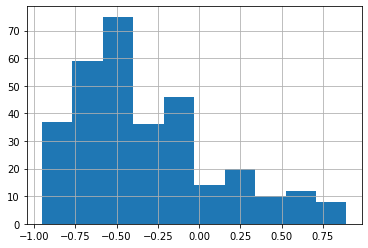

In [23]:
df['compound'].hist()
#df['neg'].hist()
#df['neu'].hist()
#df['pos'].hist()

In [24]:
df.iloc[:,-4:-1]

,neu,pos,compound
0,0.891,0.000,-0.4019
1,0.891,0.000,-0.4019
2,0.941,0.000,-0.4019
3,0.672,0.000,-0.4404
4,0.941,0.000,-0.4019
...,...,...,...
312,0.681,0.111,-0.3182
313,0.857,0.066,-0.1027
314,0.886,0.000,-0.4019
315,0.851,0.080,0.1027


In [25]:
#Importing Various twitter data
# all JP files
#Complaint
df_= pd.read_json('pretty_gs_tweets_complaint.json')


In [26]:
#LDAVIS
!pip install pyLDAvis
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

     |████████████████████████████████| 1.6MB 3.4MB/s 
     |████████████████████████████████| 552kB 25.4MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97711 sha256=4ff08e5f3ab273f73b32086ffcaab396697322e30ee858ccfb8b540c8c0b1758
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
  Created wheel for funcy: filename=funcy-1.14-py2.py3-none-any.whl size=32042 sha256=257d75e640acc887f222fcf855662474dff50acbc8a7c7eb474898becaa5273e
  Stored in directory: /root/.cache/pip/wheels/20/5a/d8/1d875df03deae6f178dfdf70238cca33f948ef8a6f5209f2eb
Successfully built pyLDAvis funcy


In [27]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [28]:
tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                max_df = 0.5, 
                                min_df = 10)

dtm_tf = tf_vectorizer.fit_transform(df['text'].values)
print(dtm_tf.shape)

(317, 100)


In [29]:
tfidf_vectorizer = TfidfVectorizer(**tf_vectorizer.get_params())

In [30]:
#dtm_tfidf = tfidf_vectorizer.fit_transform(df['text'].values)
#lda_tfidf = LatentDirichletAllocation(n_components=10, random_state=0)
#lda_tfidf.fit(dtm_tfidf)
#pyLDAvis.sklearn.prepare(lda_tfidf, dtm_tfidf, tfidf_vectorizer)

In [31]:
sentiment_wm = df_['text'].apply(lambda x: analyzer.polarity_scores(x))
df_ = pd.concat([df_, sentiment_wm.apply(pd.Series)],1)

In [32]:
df_.head()

,has_media,hashtags,img_urls,is_replied,is_reply_to,likes,links,parent_tweet_id,replies,reply_to_users,retweets,screen_name,text,text_html,timestamp,timestamp_epochs,tweet_id,tweet_url,user_id,username,video_url,neg,neu,pos,compound
0,True,[],[https://pbs.twimg.com/media/Dfg7RdjVAAAt_H5.jpg],False,False,6,[],,0,[],4,ZTracer,California regulator @CA_DaveJones cracks down...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-06-12 19:30:33,2018-06-12 19:30:33,1006619785176723456,/ZTracer/status/1006619785176723456,14622223,Zachary Tracer,,0.109,0.891,0.0,-0.4019
1,True,[],[https://pbs.twimg.com/media/Dfg7RdjVAAAt_H5.jpg],False,False,6,[],,0,[],4,ZTracer,California regulator @CA_DaveJones cracks down...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-06-12 19:30:33,2018-06-12 19:30:33,1006619785176723456,/ZTracer/status/1006619785176723456,14622223,Zachary Tracer,,0.109,0.891,0.0,-0.4019
2,False,[],[],False,False,0,[],,0,[],0,WytchesThyme,I am Prudence Shagwell formerly Chantal Maudui...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-04-05 21:36:03,2018-04-05 21:36:03,982008992464556032,/WytchesThyme/status/982008992464556032,884958231558328320,Joan Mikolajczyk,,0.059,0.941,0.0,-0.4019
3,True,[],[https://pbs.twimg.com/media/DaBr-KhV4AE-YJe.jpg],False,False,0,[http://dlvr.it/QNXKT0],,0,[],0,007_goldman,Jamie Dimon backs Trump's 'legitimate complain...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-04-05 14:36:38,2018-04-05 14:36:38,981903441638273024,/007_goldman/status/981903441638273025,762395456907284480,Goldman007,,0.328,0.672,0.0,-0.4404
4,False,[],[],False,False,0,[],,0,[],0,WytchesThyme,I am Prudence Shagwell formerly Chantal Maudui...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-04-05 21:36:03,2018-04-05 21:36:03,982008992464556032,/WytchesThyme/status/982008992464556032,884958231558328320,Joan Mikolajczyk,,0.059,0.941,0.0,-0.4019


In [33]:
df__pos = df_[df_['compound'] >= 0.05]
df__neg = df_[df_['compound'] <= -0.05]
df__neu = df_[( df_['compound'] < 0.05 ) & ( df_['compound'] > -0.05 )]


In [34]:
dtm_tfidf = tfidf_vectorizer.fit_transform(df__pos['text'].values)
lda_tfidf = LatentDirichletAllocation(n_components=10, random_state=0)
lda_tfidf.fit(dtm_tfidf)
pyLDAvis.sklearn.prepare(lda_tfidf, dtm_tfidf, tfidf_vectorizer)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:1817: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. <class 'numpy.int64'> 'dtype' will be converted to np.float64.
  UserWarning)


TypeError: ignored

PreparedData(topic_coordinates=                        x                   y  topics  cluster       Freq
topic                                                                    
7      0.286201+0.000000j  0.000000+0.000000j       1        1  25.754633
8     -0.224861+0.000000j  0.000000+0.000000j       2        1  20.614175
6     -0.223804+0.000000j  0.000000+0.000000j       3        1  20.542189
9      0.023209+0.000000j  0.000000+0.000000j       4        1   4.727001
5      0.023209+0.000000j  0.000000+0.000000j       5        1   4.727001
4      0.023209+0.000000j  0.000000+0.000000j       6        1   4.727001
3      0.023209+0.000000j  0.000000+0.000000j       7        1   4.727001
2      0.023209+0.000000j -0.000000+0.000000j       8        1   4.727001
1      0.023209+0.000000j  0.000000+0.000000j       9        1   4.727001
0      0.023209+0.000000j -0.000000+0.000000j      10        1   4.727001, topic_info=    Term       Freq      Total Category  logprob  loglift
0    com  1

In [35]:
dtm_tfidf = tfidf_vectorizer.fit_transform(df__neg['text'].values)
lda_tfidf = LatentDirichletAllocation(n_components=10, random_state=0)
lda_tfidf.fit(dtm_tfidf)
pyLDAvis.sklearn.prepare(lda_tfidf, dtm_tfidf, tfidf_vectorizer)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:1817: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. <class 'numpy.int64'> 'dtype' will be converted to np.float64.
  UserWarning)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.165205  0.272988       1        1  20.251669
2     -0.158853  0.027894       2        1  15.144418
8      0.234444 -0.254220       3        1  11.905405
6     -0.130945  0.018286       4        1  10.664878
5     -0.130256 -0.035188       5        1   8.945303
0     -0.172898 -0.041809       6        1   8.640940
7      0.122320  0.093993       7        1   8.307746
1      0.042805 -0.025463       8        1   7.595968
9     -0.007397 -0.025991       9        1   5.226068
4      0.035575 -0.030488      10        1   3.317604, topic_info=             Term       Freq      Total Category  logprob  loglift
22          fraud   9.000000   9.000000  Default  30.0000  30.0000
40           look   9.000000   9.000000  Default  29.0000  29.0000
9            card  16.000000  16.000000  Default  28.0000  28.0000
14           drop   8.000000   8.000000  Default  27.0000  27.0000
2           apple  16.000000  16.000000  Default  26.0000  26.0000
..            ...        ...        ...      ...      ...      ...
2           apple   0.144425  16.952877  Topic10  -4.8847  -1.3595
27           html   0.144425   6.674620  Topic10  -4.8847  -0.4274
8        business   0.144425   6.630017  Topic10  -4.8847  -0.4207
77  whistleblower   0.144425   7.665174  Topic10  -4.8847  -0.5658
46            nyt   0.144425   5.339781  Topic10  -4.8847  -0.2043

[462 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
0         3  0.777197   adam
1         8  0.569600   alex
1         9  0.379733   alex
2         1  0.943793  apple
2         7  0.058987  apple
...     ...       ...    ...
79        5  0.105047    www
79        8  0.210095    www
80        1  0.722356   york
80        3  0.090294   york
80        7  0.090294   york

[146 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 3, 9, 7, 6, 1, 8, 2, 10, 5])

In [37]:
dtm_tfidf = tfidf_vectorizer.fit_transform(df__neu['text'].values)
lda_tfidf = LatentDirichletAllocation(n_components=10, random_state=0)
lda_tfidf.fit(dtm_tfidf)
pyLDAvis.sklearn.prepare(lda_tfidf, dtm_tfidf, tfidf_vectorizer)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:1817: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. <class 'numpy.int64'> 'dtype' will be converted to np.float64.
  UserWarning)


ValueError: ignored

In [38]:
print(df__pos.shape)
print(df__neg.shape)
print(df__neu.shape)

(57, 25)
(251, 25)
(9, 25)
